In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

# Importing the data, splitting into train and test set and scaling

In [2]:
data = pd.read_pickle('Data.pickle')

X = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1]).reshape(-1, 1)

In [3]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size)

In [4]:
# Scaling the X-values

# Using scikit-learns StandardScaler
x_scaler = StandardScaler()

# Fit the scaler on the training data
x_scaler.fit(X_train)

# Transform the training data
X_train_scaled = x_scaler.transform(X_train)

# Transform the test data
X_test_scaled = x_scaler.transform(X_test)

# Transform all the data
X_all_scaled = x_scaler.transform(X)

In [5]:
# Scaling the target values

y_scaler = StandardScaler()

# Fit the scaler on the training target
y_scaler.fit(y_train)

# Transform the training target
y_train_scaled = y_scaler.transform(y_train)

# Creating linear regression model

In [6]:
# Creating a LinearRegression object
model_OLS = LinearRegression(fit_intercept=True)

# Fitting the model using the training data
model_OLS.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [7]:
# Making predictions using the test data
y_pred_test_scaled = model_OLS.predict(X_test_scaled)
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled)  # "un-scaling" the data for comparing with original data

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.6573803484820875
R-squared: 0.9584089621612861


In [8]:
# Coefficients
print("Coefficients:", model_OLS.coef_)

# Intercept
print("Intercept:", model_OLS.intercept_)

Coefficients: [[ 0.62975754  0.43200245 -0.01559402 -0.07548855  0.02891275 -0.02839754]]
Intercept: [1.71289671e-14]


Mean Squared Error full dataset: 7.503063012451906
R-squared full dataset: 0.9598443203000392


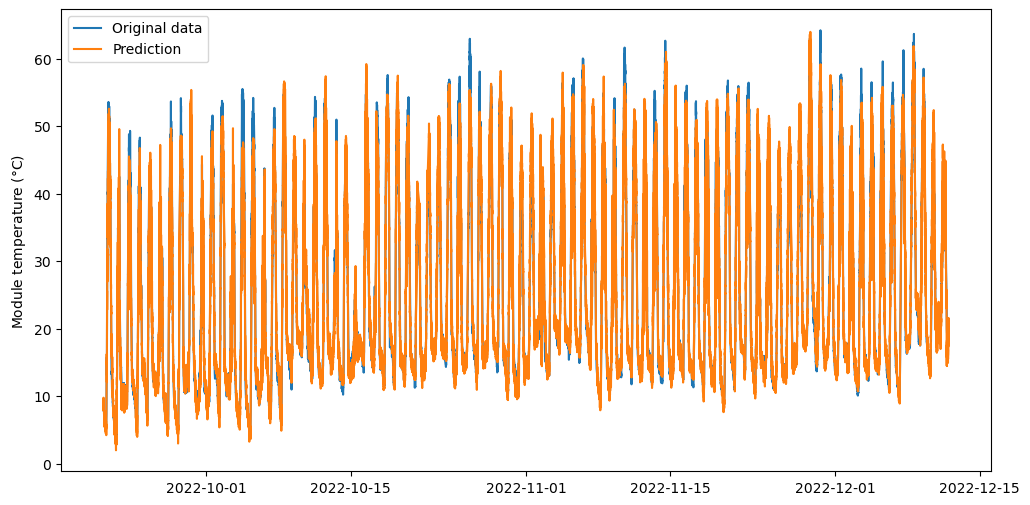

In [9]:
# Plotting the prediction together with the original data

y_pred_all_scaled = model_OLS.predict(X_all_scaled)
y_pred_all = y_scaler.inverse_transform(y_pred_all_scaled)  # "un-scaling" the data for comparing with original data

mse = mean_squared_error(target, y_pred_all)
r2 = r2_score(target, y_pred_all)

print(f"Mean Squared Error full dataset: {mse}")
print(f"R-squared full dataset: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, target, label="Original data")
plt.plot(data.index, y_pred_all, label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\LinReg\OLS_plot_of_predicted_and_original_data.png")
plt.show()

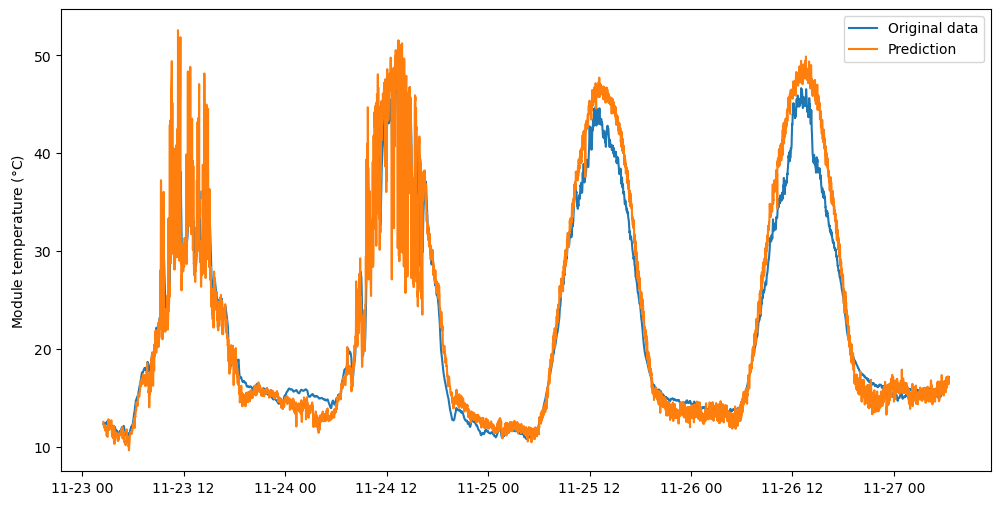

In [10]:
# Only looking at some days

plt.figure(figsize=(12, 6))
plt.plot(data.iloc[90000:96000, :].index, target[90000:96000, :], label="Original data")
plt.plot(data.iloc[90000:96000, :].index, y_pred_all[90000:96000, :], label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\LinReg\OLS_plot_of_predicted_and_original_data_some_days.png")
plt.show()

# Creating a model using Ridge regression

In [11]:
model_ridge = Ridge(fit_intercept=True)
lambdas = np.logspace(-5, 4, 10)  # Values for lambda, evenly spaced on a log scale between 10^-4 and 10^4.
parameters = {'alpha': lambdas}

gridsearch = GridSearchCV(model_ridge, parameters, scoring='r2', cv=5)  # 5-fold cross-validation
gridsearch.fit(X_train_scaled, y_train_scaled)

print("Best parameters: ", gridsearch.best_params_)
print("Best R^2 score: ", gridsearch.best_score_)

Best parameters:  {'alpha': 1.0}
Best R^2 score:  0.9601888437028381


In [12]:
# Fitting a new model using the best value for lambda

model_ridge = Ridge(1.0, fit_intercept=True)

# Fitting the model using the training data
model_ridge.fit(X_train_scaled, y_train_scaled)

Ridge()

In [13]:
# Making predictions using the test data
y_pred_test_ridge_scaled = model_ridge.predict(X_test_scaled)
y_pred_test_ridge = y_scaler.inverse_transform(y_pred_test_ridge_scaled)  

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_test_ridge)
r2 = r2_score(y_test, y_pred_test_ridge)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients
print("Coefficients:", model_ridge.coef_)

# Intercept
print("Intercept:", model_ridge.intercept_)


Mean Squared Error: 7.657379428609506
R-squared: 0.9584089671575713
Coefficients: [[ 0.62974795  0.43198305 -0.01558749 -0.07548858  0.02891389 -0.02841773]]
Intercept: [1.71279792e-14]


Mean Squared Error full dataset: 7.503062850736588
R-squared full dataset: 0.9598443211655242


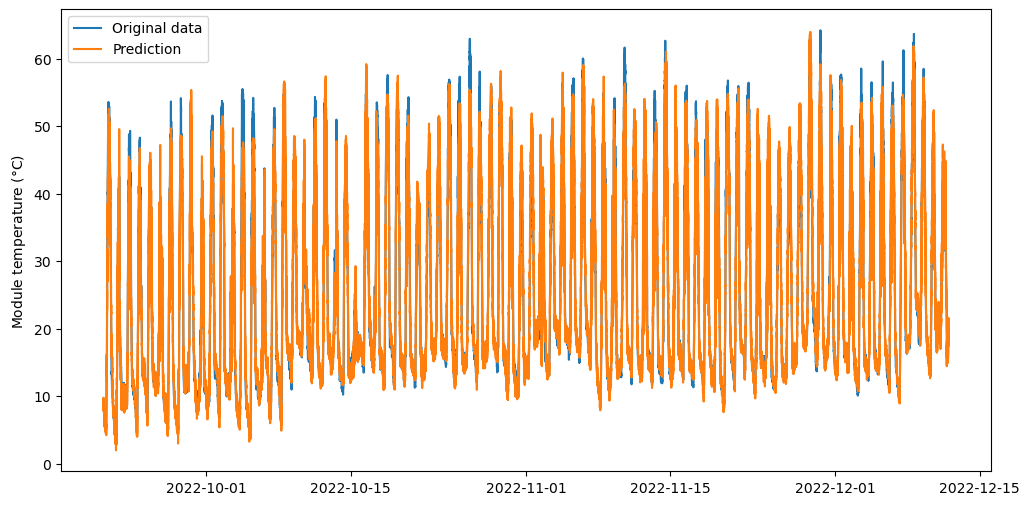

In [14]:
# Plotting the prediction together with the original data

y_pred_all_ridge_scaled = model_ridge.predict(X_all_scaled)
y_pred_all_ridge = y_scaler.inverse_transform(y_pred_all_ridge_scaled)  

mse = mean_squared_error(target, y_pred_all_ridge)
r2 = r2_score(target, y_pred_all_ridge)

print(f"Mean Squared Error full dataset: {mse}")
print(f"R-squared full dataset: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, target, label="Original data")
plt.plot(data.index, y_pred_all_ridge, label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\LinReg\Ridge_plot_of_predicted_and_original_data.png")
plt.show()

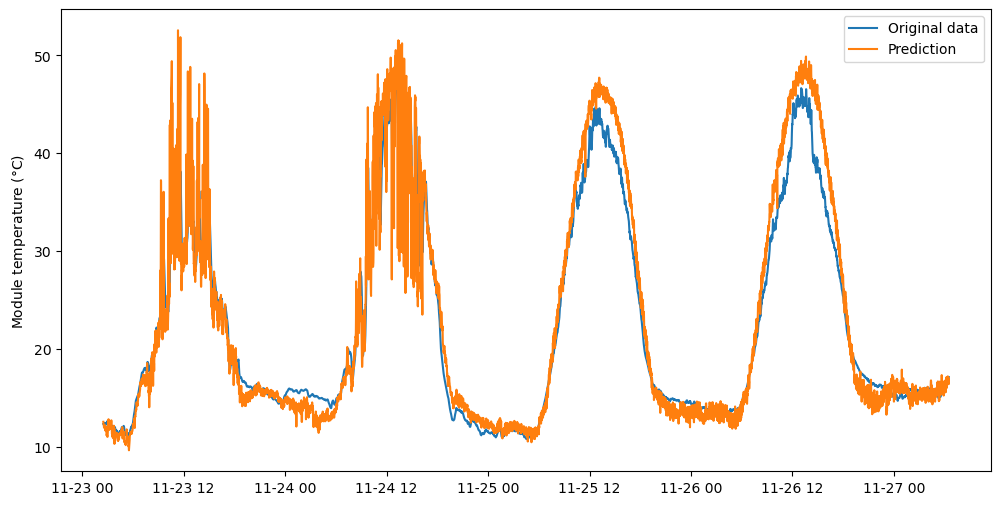

In [15]:
# Only looking at some days

plt.figure(figsize=(12, 6))
plt.plot(data.iloc[90000:96000, :].index, target[90000:96000, :], label="Original data")
plt.plot(data.iloc[90000:96000, :].index, y_pred_all_ridge[90000:96000, :], label="Prediction")
plt.ylabel(r"Module temperature ($\degree$C)")
plt.legend()
plt.savefig(r"Figures\LinReg\Ridge_plot_of_predicted_and_original_data_some_days.png")
plt.show()